<a href="https://colab.research.google.com/github/altamashsameer/altamashsameer.github.io/blob/master/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crypto = pd.DataFrame(pd.read_csv("Bitcoin.csv"))

In [3]:
crypto.shape

(1151, 7)

In [4]:
crypto.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD


In [5]:
crypto.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [83]:
crypto['Currency'].unique()


array(['USD'], dtype=object)

In [17]:
crypto = crypto.drop('Currency', axis = 1)

In [10]:
print(crypto.loc[crypto['Volume'] == crypto['Volume'].max()])

           Date          Open         High           Low         Close  \
674  2021-04-22  53832.339844  55629.28125  50883.050781  51819.691406   

          Volume Currency  
674  579170589.0      USD  


In [94]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1151 non-null   object 
 1   Open    1151 non-null   float64
 2   High    1151 non-null   float64
 3   Low     1151 non-null   float64
 4   Close   1151 non-null   float64
 5   Volume  1151 non-null   float64
dtypes: float64(5), object(1)
memory usage: 54.1+ KB


In [6]:
crypto.describe()

,Open,High,Low,Close,Volume
count,1151.000000,1151.000000,1151.000000,1151.000000,1.151000e+03
mean,26488.652992,27528.416710,25416.606967,26496.733082,2.874051e+07
std,17963.101635,18432.925246,17484.604545,17952.113609,5.202999e+07
min,4943.832520,5338.512695,0.076853,4936.755371,0.000000e+00
25%,9706.758301,10090.012695,9360.636230,9712.636719,7.495500e+03
50%,20873.337891,21867.822266,20245.201172,20902.404297,1.864334e+06
75%,41782.333984,42749.439453,40890.394531,41782.333984,4.076471e+07
max,67470.437500,85563.984375,66072.343750,67502.421875,5.791706e+08


In [7]:
crypto.isnull().sum()*100/crypto.shape[0]

,0
Date,0.0
Open,0.0
High,0.0
Low,0.0
Close,0.0
Volume,0.0
Currency,0.0


<Axes: xlabel='Date', ylabel='Open'>

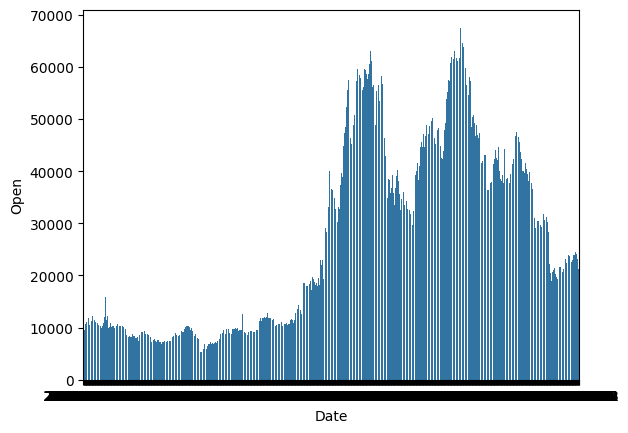

In [10]:
sns.barplot(x="Date",y="Open",data=crypto)

<Axes: xlabel='Date', ylabel='Close'>

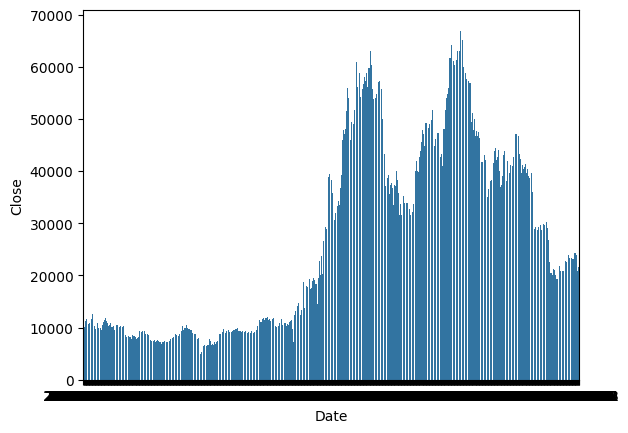

In [11]:
sns.barplot(x="Date",y="Close",data=crypto)

<Axes: xlabel='Date', ylabel='High'>

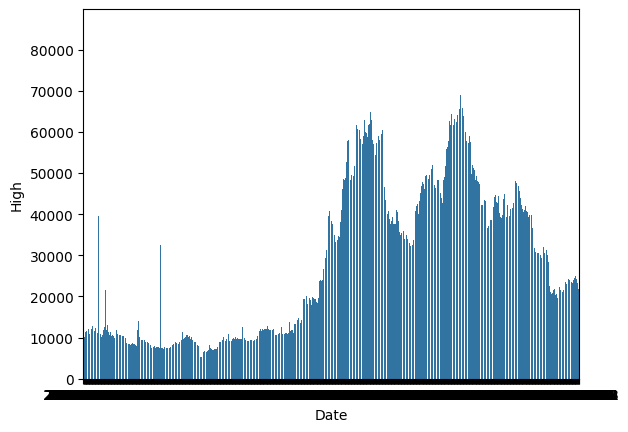

In [12]:
sns.barplot(x="Date",y="High",data=crypto)

<Axes: xlabel='Date', ylabel='Low'>

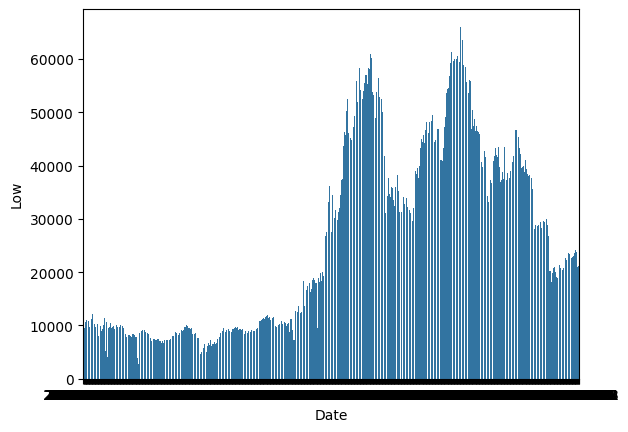

In [13]:
sns.barplot(x="Date",y="Low",data=crypto)

<Axes: xlabel='Date', ylabel='Volume'>

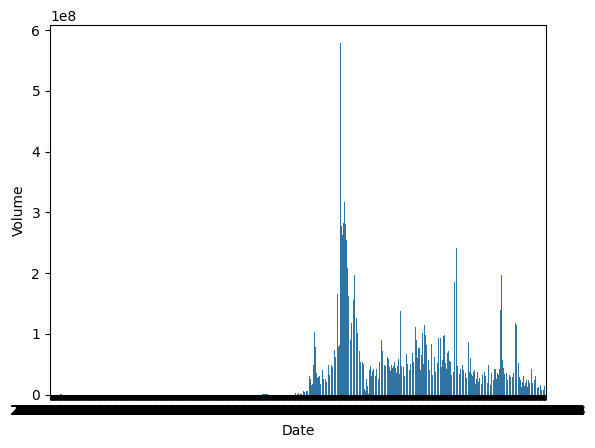

In [14]:
sns.barplot(x="Date",y="Volume",data=crypto)

In [17]:
difference = crypto.Close - crypto.Open
crypto['difference'] = difference

<Axes: xlabel='Date', ylabel='difference'>

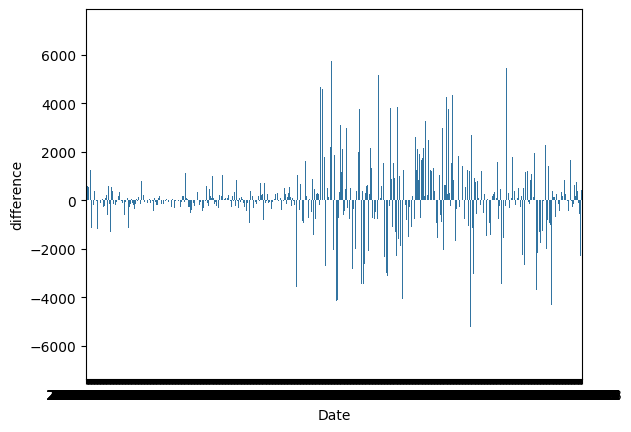

In [18]:
sns.barplot(x="Date",y="difference",data=crypto)

In [24]:
Gain = crypto[crypto.difference > 0]
loss = crypto[crypto.difference < 0]

<Axes: xlabel='Date', ylabel='difference'>

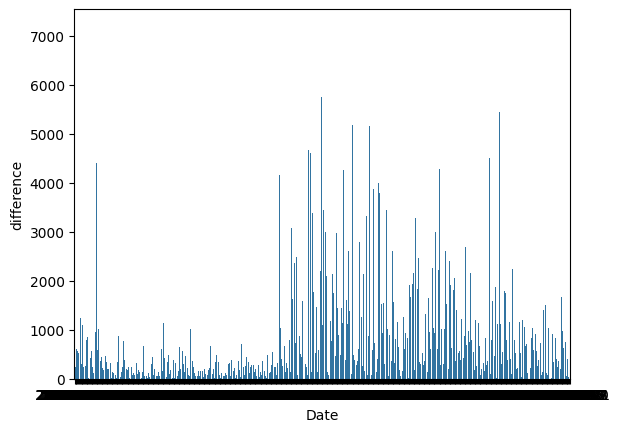

In [22]:
sns.barplot(x="Date",y="difference",data=Gain)

<Axes: xlabel='Date', ylabel='difference'>

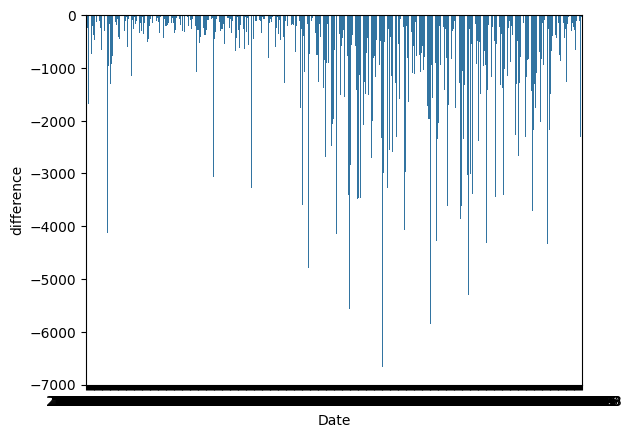

In [59]:
sns.barplot(x="Date",y="difference",data=loss)

In [48]:
net_gain = Gain.difference.sum()
net_loss = loss.difference.sum()
profit = net_gain + net_loss
print (net_gain)
print (net_loss)
print (profit)

480922.3330078125
-471622.14892578125
9300.18408203125


In [44]:
crypto.Date.iloc[0]

'2019-06-18'

In [49]:
crypto.Date.iloc[-1]

'2022-08-23'

In [13]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(crypto, train_size = 0.75, test_size = 0.25, random_state = 100)

**Random Forest**

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


X = crypto.drop('Close', axis=1)
y = crypto['Close']

le = LabelEncoder()

X['Date'] = le.fit_transform(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rf_rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Root Mean Squared Error: 953.65
R-squared: 1.00


**Linear Regression**

In [26]:
from sklearn.linear_model import LinearRegression

X = crypto.drop('Close', axis=1)
y = crypto['Close']

X['Date'] = le.fit_transform(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {lr_rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Root Mean Squared Error: 2003.86
R-squared: 0.99


**Lasso regression in Linear Regression**

In [27]:
from sklearn.linear_model import LassoCV

X = crypto.drop('Close', axis=1)
y = crypto['Close']

le = LabelEncoder()
X['Date'] = le.fit_transform(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

selected_features = X_train.columns[lasso.coef_ != 0]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = LinearRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')
print("Selected Features:", selected_features)

Root Mean Squared Error: 13343.19
R-squared: 0.41
Selected Features: Index(['Volume'], dtype='object')


**KNN**

In [40]:
from sklearn.neighbors import KNeighborsRegressor

X = crypto.drop('Close', axis=1)
y = crypto['Close']

le = LabelEncoder()

X['Date'] = le.fit_transform(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsRegressor(n_neighbors=9)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {knn_rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Root Mean Squared Error: 7404.13
R-squared: 0.82


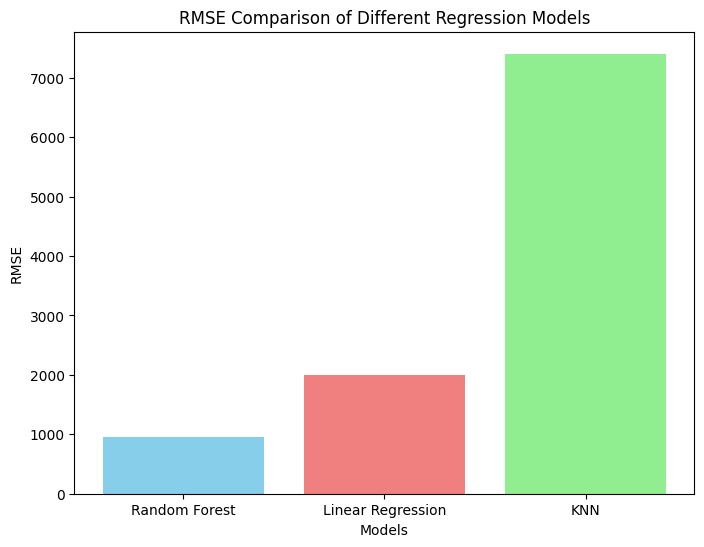

In [41]:
models = ['Random Forest', 'Linear Regression', 'KNN']
rmse_values = [rf_rmse, lr_rmse, knn_rmse]

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Regression Models')
plt.show()
